# Question 1  



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [46]:
from google.colab import files
uploaded = files.upload()

Saving Cutlets.csv to Cutlets (1).csv


In [47]:
cutlets = pd.read_csv("Cutlets.csv")

In [48]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [49]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [50]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [51]:
cutlets[cutlets.duplicated()].shape

(0, 2)

In [52]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


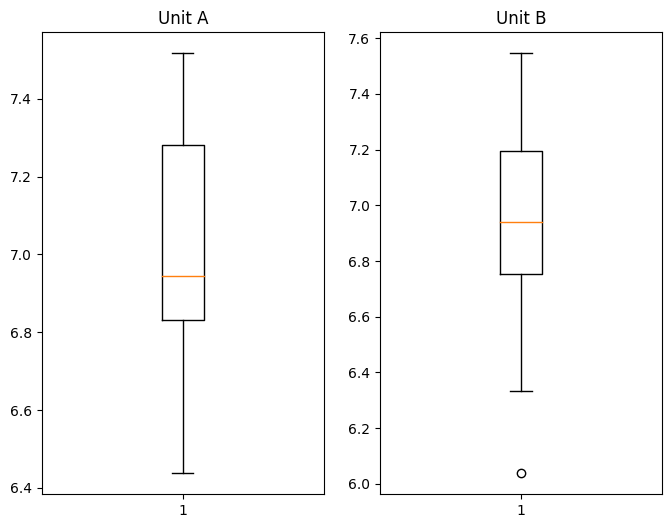

In [77]:
unit1 = cutlets['Unit A']
unit2 = cutlets['Unit B']
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.boxplot(x = unit1)
plt.title('Unit A')
plt.subplot(1,2,2)
plt.boxplot(x = unit2)
plt.title('Unit B')
plt.show()

In [54]:
unit1 = cutlets['Unit A']
unit2 = cutlets['Unit B']

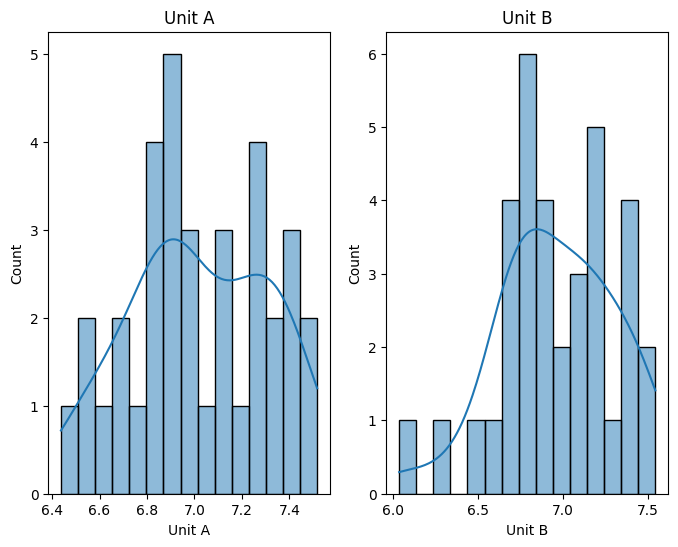

In [171]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
sns.histplot(unit1, kde = True, bins = 15)
plt.title('Unit A')
plt.subplot(1,2,2)
sns.histplot(unit2, kde = True, bins = 15)
plt.title('Unit B')
plt.show()

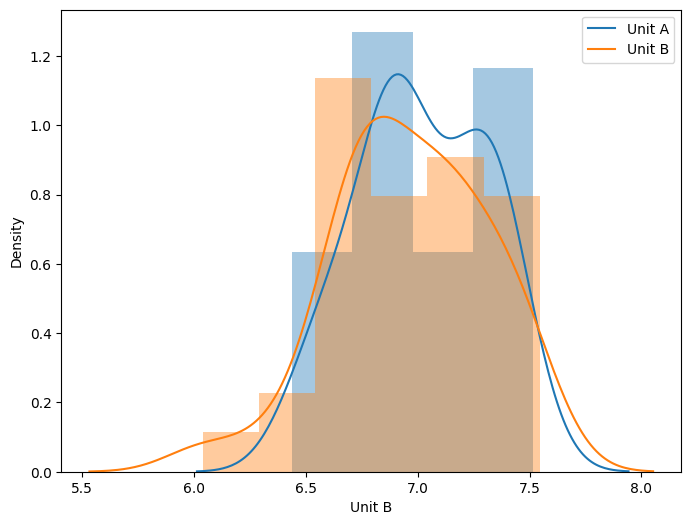

In [170]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(unit1, kde = True)
sns.distplot(unit2, kde = True)
plt.legend(labels);

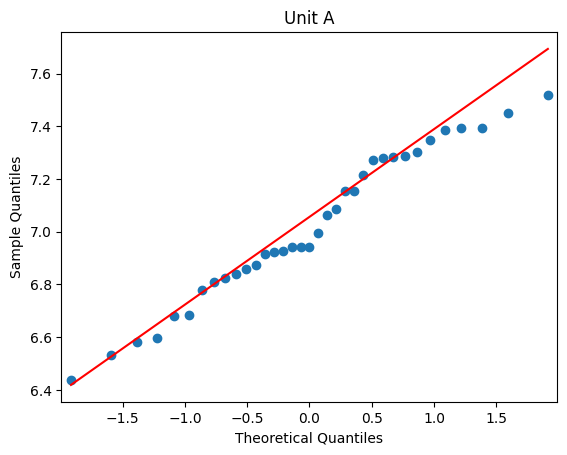

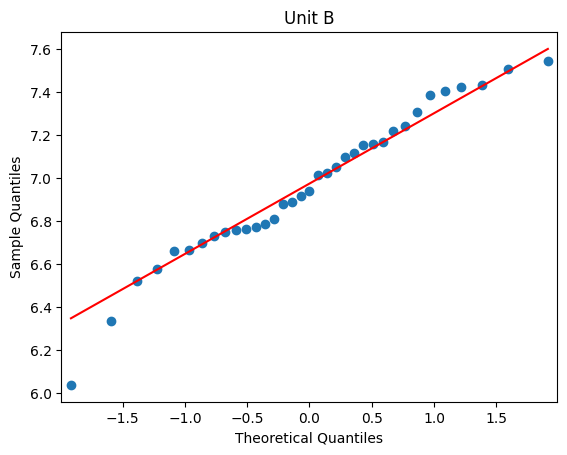

In [68]:
sm.qqplot(unit1, line = "q")
plt.title("Unit A")
sm.qqplot(unit2, line = 'q')
plt.title("Unit B")
plt.show()

### Comparing Evidences with Hypothesis using t-statistics

In [84]:
statistic, p_value = stats.ttest_ind(unit1, unit2, alternative = 'two-sided')
print(f"{statistic:.3f}, {p_value:.3f}")

0.723, 0.472


Null Hypothesis (H0): The mean diameter of cutlets in Unit A is equal to the mean diameter of cutlets in Unit B. (μA = μB)

Alternative Hypothesis (H1): The mean diameter of cutlets in Unit A is not equal to the mean diameter of cutlets in Unit B. (μA ≠ μB)
Decision:

If the p-value from the t-test is less than the chosen significance level, we reject the null hypothesis.

If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.

In [90]:
alpha = 0.05
print(f"Significance = {alpha:.3f}, P_Value = {p_value:.3f}")
if p_value <= alpha:
    print("We reject null hypothesis, there is significant difference in the diameter of cutlets. ")
else:
    print("""We fail to reject null hypothesis, Therefore, we do not have sufficient evidence
to conclude that there is a significant difference in the mean diameter of cutlets
between Unit A and Unit B at the 5% significance level.""")

Significance = 0.050, P_Value = 0.472
We fail to reject null hypothesis, Therefore, we do not have sufficient evidence
to conclude that there is a significant difference in the mean diameter of cutlets 
between Unit A and Unit B at the 5% significance level.



# Question 2

In [91]:
from google.colab import files
uploaded = files.upload()

Saving LabTAT.csv to LabTAT.csv


In [92]:
data = pd.read_csv('LabTAT.csv')

In [93]:
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [94]:
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [96]:
data.isnull().any()

Laboratory 1    False
Laboratory 2    False
Laboratory 3    False
Laboratory 4    False
dtype: bool

In [99]:
lab1 = data['Laboratory 1']
lab2 = data['Laboratory 2']
lab3 = data['Laboratory 3']
lab4 = data['Laboratory 4']

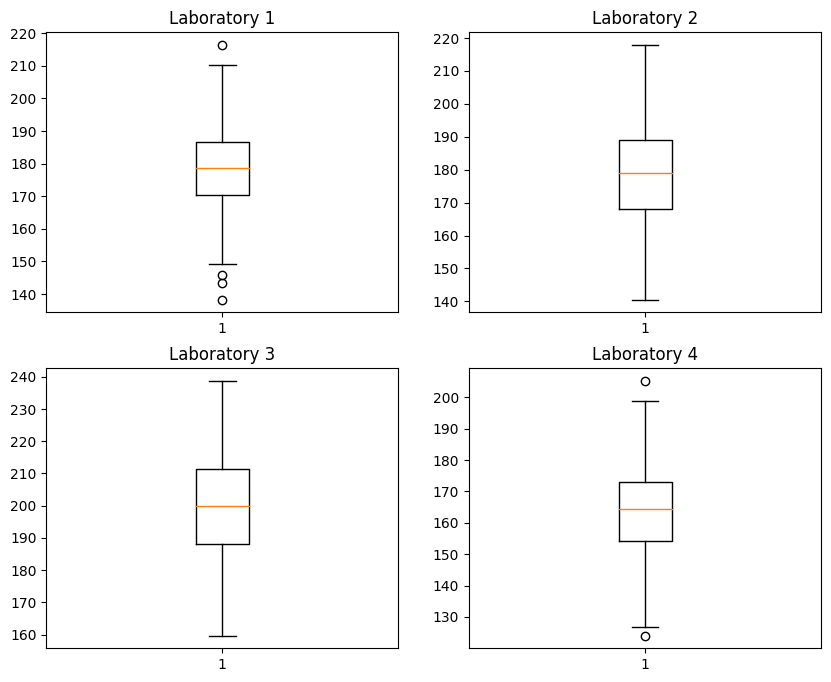

In [118]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
plt.boxplot(lab1)
plt.title('Laboratory 1')
plt.subplot(2,2,2)
plt.boxplot(lab2)
plt.title('Laboratory 2')
plt.subplot(2,2,3)
plt.boxplot(lab3)
plt.title('Laboratory 3')
plt.subplot(2,2,4)
plt.boxplot(lab4)
plt.title('Laboratory 4')
plt.show()

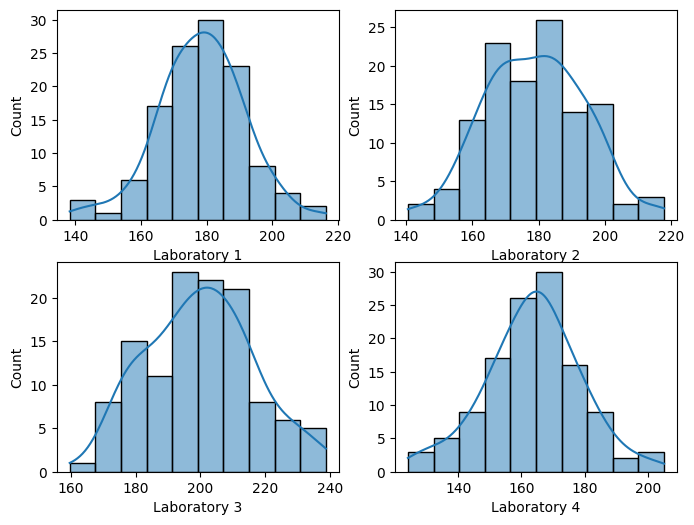

In [169]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1)
sns.histplot(lab1, kde = True, bins = 10)
plt.subplot(2,2,2)
sns.histplot(lab2, kde = True, bins = 10)
plt.subplot(2,2,3)
sns.histplot(lab3, kde = True, bins = 10)
plt.subplot(2,2,4)
sns.histplot(lab4, kde = True, bins = 10)
plt.show()

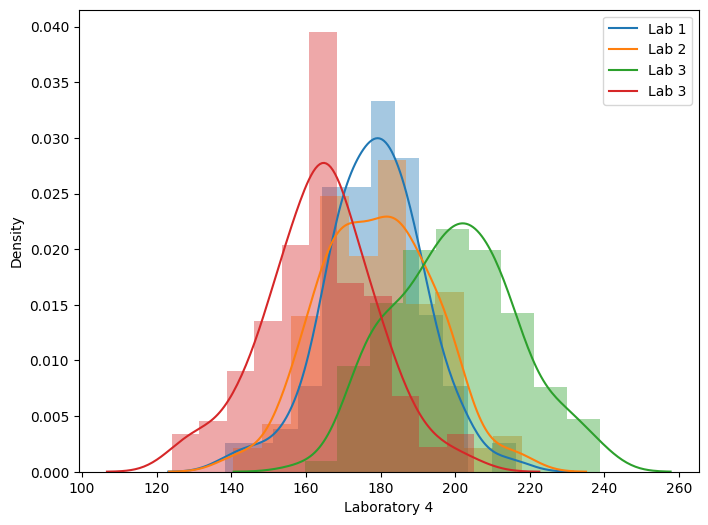

In [168]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2', 'Lab 3', 'Lab 3']
sns.distplot(lab1, kde = True)
sns.distplot(lab2, kde = True)
sns.distplot(lab3, kde = True)
sns.distplot(lab4, kde = True)
plt.legend(labels)
plt.show()

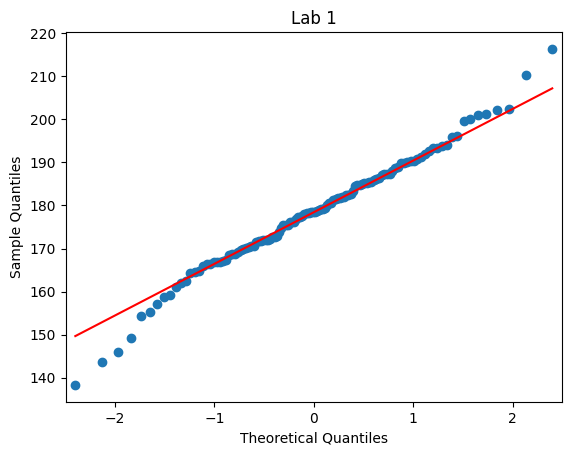

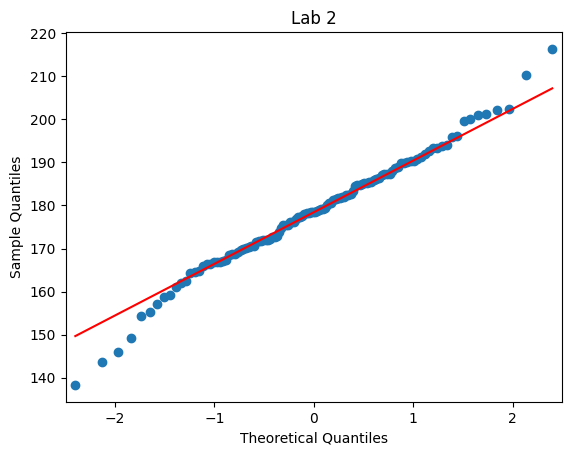

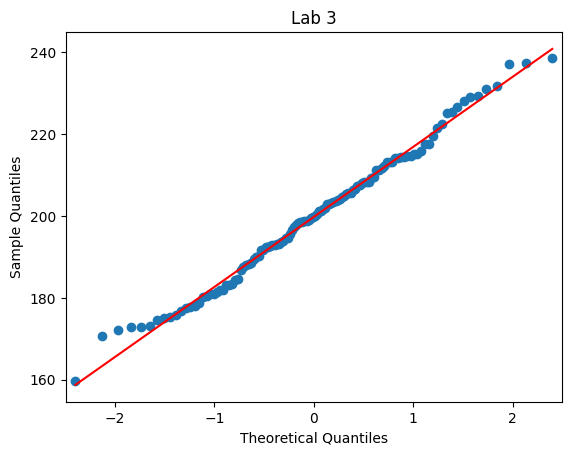

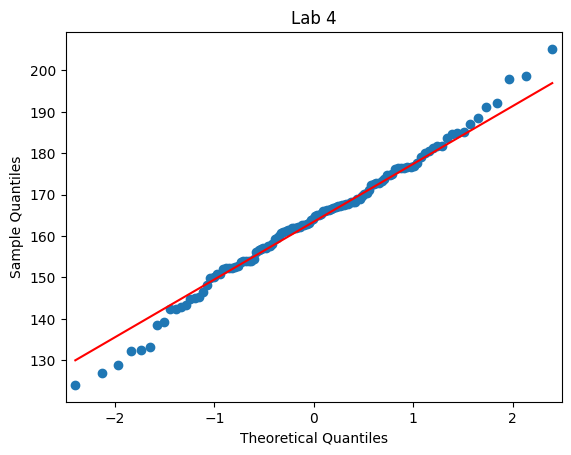

In [128]:
sm.qqplot(lab1, line = 'q')
plt.title('Lab 1')
sm.qqplot(lab1, line = 'q')
plt.title('Lab 2')
sm.qqplot(lab3, line = 'q')
plt.title('Lab 3')
sm.qqplot(lab4, line = 'q')
plt.title('Lab 4')
plt.show()

### Finding t-statistic

In [143]:
test_statistic, p_value = stats.f_oneway(lab1, lab2, lab3, lab4)
print(p_value)

2.1156708949992414e-57


In [145]:
alpha = 0.05
print(f"Significance = {alpha:.3f}, P_Value = {p_value:.3f}")
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significance = 0.050, P_Value = 0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Question 3

In [146]:
from google.colab import files
uploaded = files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [147]:
buyer = pd.read_csv('BuyerRatio.csv', index_col = 0)
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [148]:
table = [[50,142,131,70],
         [435,1523,1356,750]]

In [150]:
stat, p, dof, exp = stats.chi2_contingency(buyer)
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [152]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

### Comparing Evidence with Hypothesis

In [153]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
alpha = 0.05
print(f"Significance = {alpha:.3f}, P_value = {p_value}")
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significance = 0.050, P_value = 0.8095206646905712
We fail to reject Null hypothesis


# Question 4

In [154]:
from google.colab import files
uploaded = files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm.csv


In [167]:
order = pd.read_csv('Costomer+OrderForm.csv')
order.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [172]:
order.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [173]:
order.isnull().any()

Phillippines    False
Indonesia       False
Malta           False
India           False
dtype: bool

In [174]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [189]:
print(order['Phillippines'].value_counts(),'\n',
order['Indonesia'].value_counts(),'\n',
order['Malta'].value_counts(),'\n',
order['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [190]:
table = [[271,267,269,280],
        [29,33,31,20]]

In [191]:
#Calculating expected values
stat, p, df, exp = stats.chi2_contingency(table)
print(exp)

[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [192]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

### Comparing evidences with hypothesis using t-statistic

In [193]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print(f"Test_Statistic = {test_statistic:.3f}, P_value = {p_value:.3f}")
alpha = 0.05
print(f"Significance = {alpha:.3f}, P_Value = {p_value:.3f}")
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Test_Statistic = 3.859, P_value = 0.425
Significance = 0.050, P_Value = 0.425
We fail to reject Null hypothesis
